In [44]:
import numpy as np
import cv2
from insightface.app import FaceAnalysis
from PIL import Image
from IPython.display import display, Image

In [45]:
image_file = "/Users/tayamayuto/Face_recognition_IF/data/input/face_v2.jpg"
img = cv2.imread(image_file)

In [46]:
app = FaceAnalysis()
app.prepare(ctx_id=0, det_size=(640, 640))

/Users/tayamayuto/Face_recognition_IF/face_env/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/tayamayuto/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/tayamayuto/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/tayamayuto/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/tayamayuto/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /Users/tayamayuto/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3,

In [52]:
faces = app.get(np.array(img))

/Users/tayamayuto/Face_recognition_IF/face_env/lib/python3.10/site-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


{'bbox': array([743.66675, 308.35953, 930.14545, 560.32007], dtype=float32), 'kps': array([[780.3588 , 406.15503],
       [853.0875 , 434.09015],
       [788.23834, 465.4871 ],
       [767.0148 , 480.76202],
       [837.11786, 503.44568]], dtype=float32), 'det_score': 0.9103078, 'landmark_3d_68': array([[ 7.80284607e+02,  3.91462280e+02,  1.55614014e+02],
       [ 7.75366760e+02,  4.16824005e+02,  1.55036072e+02],
       [ 7.69483032e+02,  4.42367004e+02,  1.52341721e+02],
       [ 7.64253357e+02,  4.66904297e+02,  1.45078644e+02],
       [ 7.58410034e+02,  4.89063690e+02,  1.27043625e+02],
       [ 7.58545959e+02,  5.07710938e+02,  1.09490051e+02],
       [ 7.59960266e+02,  5.23735291e+02,  9.20424957e+01],
       [ 7.60990173e+02,  5.39139282e+02,  6.77454987e+01],
       [ 7.77273743e+02,  5.56140381e+02,  4.45936584e+01],
       [ 8.09265198e+02,  5.58141541e+02,  3.98402519e+01],
       [ 8.40047913e+02,  5.52659729e+02,  5.03766747e+01],
       [ 8.66511536e+02,  5.43908508e+02, 

In [59]:
test_face = [faces[0]]
rimg = app.draw_on(img, test_face)

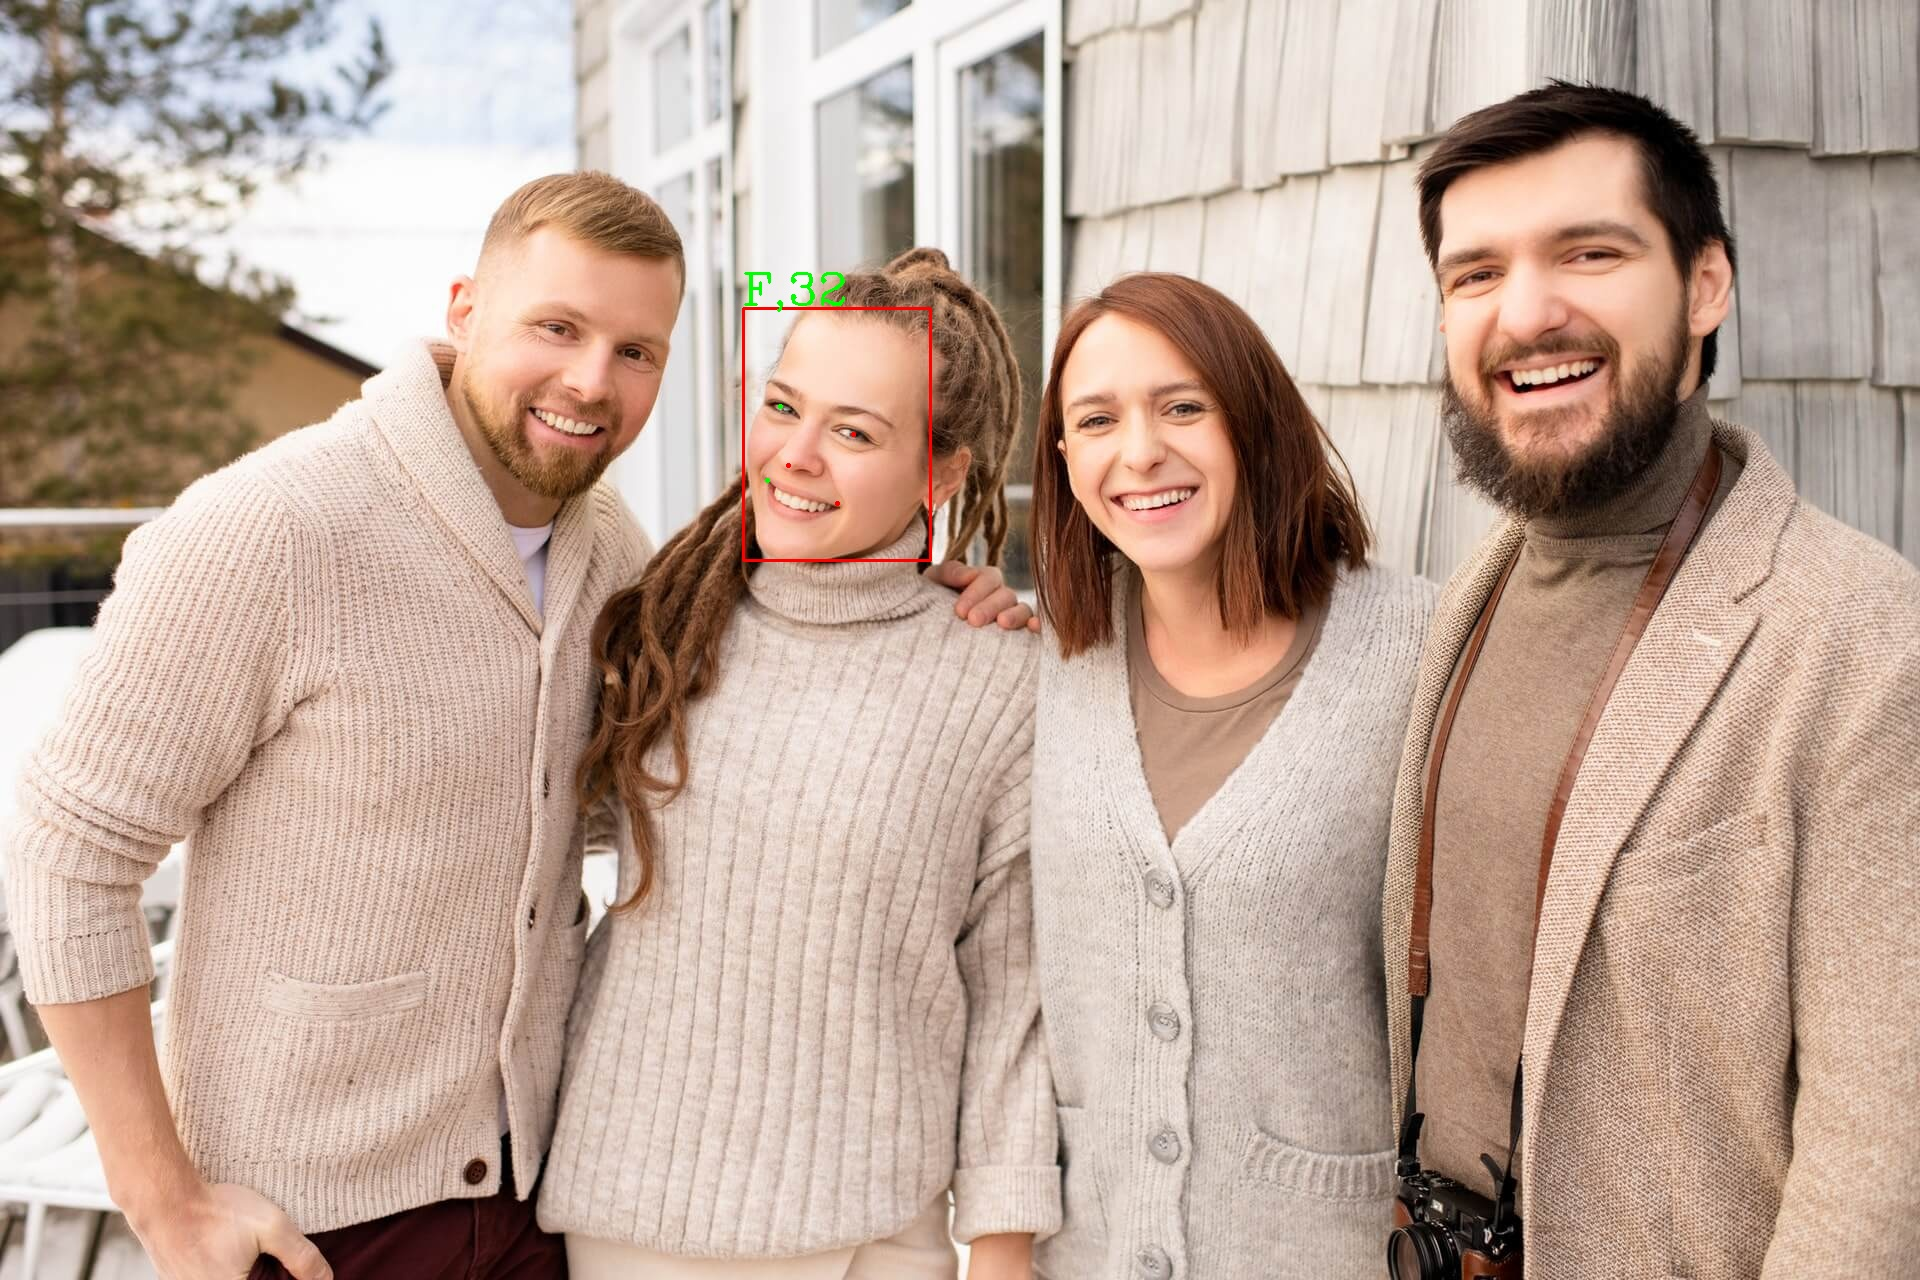

In [60]:
_, buf = cv2.imencode(".jpg", rimg)
display(Image(data=buf.tobytes()))

In [36]:
import insightface
from insightface.app.common import Face
from insightface.model_zoo import model_zoo

In [37]:
det_model_path = 'buffalo_s/det_500m.onnx'
rec_model_path = 'buffalo_s/w600k_mbf.onnx'

det_model = model_zoo.get_model(f'/Users/tayamayuto/Face_recognition_IF/.insightface/models/{det_model_path}')
rec_model = model_zoo.get_model(f'/Users/tayamayuto/Face_recognition_IF/.insightface/models/{rec_model_path}')

det_model.prepare(ctx_id=0, input_size=(640, 640), det_thres=0.5)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}


/Users/tayamayuto/Face_recognition_IF/face_env/lib/python3.10/site-packages/onnxruntime/capi/onnxruntime_inference_collection.py:65: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'CPUExecutionProvider'
  warnings.warn(


In [43]:
img = cv2.imread('/Users/tayamayuto/Face_recognition_IF/data/input/face_v2.jpg')

bboxes, kpss = det_model.detect(img, max_num=0, metric='defualt')

print(bboxes)
print(kpss)

[[1.0641306e+03 3.1574664e+02 1.2425327e+03 5.6623730e+02 9.1421938e-01]
 [7.4432562e+02 3.1126404e+02 9.2833344e+02 5.5917102e+02 8.8581848e-01]
 [4.7231943e+02 2.3812740e+02 6.7558783e+02 4.9377472e+02 8.6081779e-01]
 [1.4372250e+03 1.4379588e+02 1.6880398e+03 4.7833536e+02 7.7740568e-01]]
[[[1101.7802   426.7093 ]
  [1182.419    410.44214]
  [1144.237    463.8059 ]
  [1117.8663   499.71756]
  [1198.176    484.51926]]

 [[ 780.74176  405.84073]
  [ 860.50116  430.7835 ]
  [ 794.95703  461.00693]
  [ 765.5978   486.83972]
  [ 830.9668   508.0934 ]]

 [[ 565.7449   330.30023]
  [ 643.44525  358.97812]
  [ 603.4485   398.36133]
  [ 531.79834  409.36847]
  [ 605.729    435.04727]]

 [[1481.8569   274.44064]
  [1592.9154   256.44336]
  [1528.0669   320.72562]
  [1500.7688   383.4957 ]
  [1607.4766   366.84894]]]
